In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import itertools

import keras
from keras.models import Sequential
from keras.layers import Dense

import tensorflow as tf
tf.random.set_seed(4)
from tensorflow import keras

In [ ]:
from google.colab import files
upload = files.upload()

Saving framingham.csv to framingham.csv


In [ ]:
dataset= pd.read_csv('framingham.csv')

In [ ]:
dataset.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
dataset.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
dataset.shape

(4238, 16)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
dataset.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


**Data Pre-processing**

In [ ]:
count=0
for i in dataset.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('Since the number of rows with missing values are only',round((count/len(dataset.index))*100), '% of the entire dataset given, we decide to drop the rows with the missing or NaN values.')

Total number of rows with missing values is  582
Since the number of rows with missing values are only 14 % of the entire dataset given, we decide to drop the rows with the missing or NaN values.


In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
dataset.shape

(3656, 16)

In [ ]:
dataset.mean()

male                 0.443654
age                 49.557440
education            1.979759
currentSmoker        0.489059
cigsPerDay           9.022155
BPMeds               0.030361
prevalentStroke      0.005744
prevalentHyp         0.311543
diabetes             0.027079
totChol            236.873085
sysBP              132.368025
diaBP               82.912062
BMI                 25.784185
heartRate           75.730580
glucose             81.856127
TenYearCHD           0.152352
dtype: float64

Removing outliers

<Axes: >

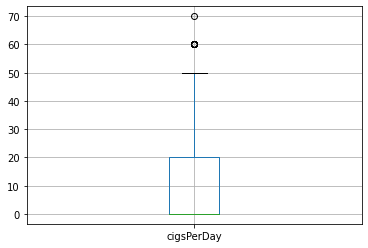

In [ ]:
dataset.boxplot(column='cigsPerDay')

In [ ]:
dataset.loc[dataset['cigsPerDay'] > 59, 'cigsPerDay'] = 9.02

<Axes: >

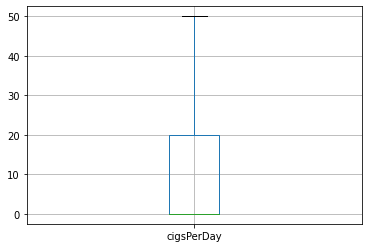

In [ ]:
dataset.boxplot(column='cigsPerDay') #after removing outliers

In [ ]:
dataset['totChol'].describe()

count    3656.000000
mean      236.873085
std        44.096223
min       113.000000
25%       206.000000
50%       234.000000
75%       263.250000
max       600.000000
Name: totChol, dtype: float64

<Axes: >

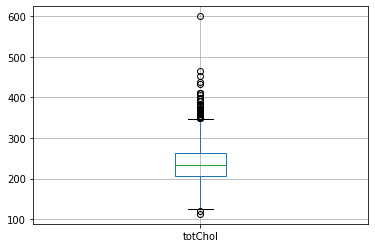

In [ ]:
dataset.boxplot(column='totChol')

In [ ]:
dataset.loc[dataset['totChol'] > 480, 'totChol'] = 237

<Axes: >

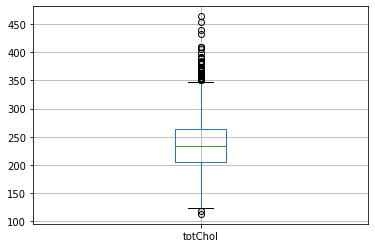

In [ ]:
dataset.boxplot(column='totChol')

In [ ]:
dataset['sysBP'].describe()

count    3656.000000
mean      132.368025
std        22.092444
min        83.500000
25%       117.000000
50%       128.000000
75%       144.000000
max       295.000000
Name: sysBP, dtype: float64

<Axes: >

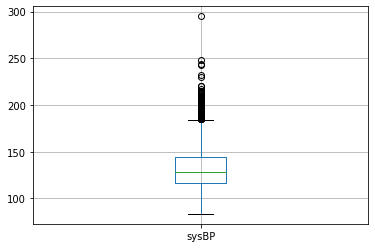

In [ ]:
dataset.boxplot(column='sysBP')

In [ ]:
dataset.loc[dataset['sysBP'] > 270, 'sysBP'] = dataset['sysBP'].median()

<Axes: >

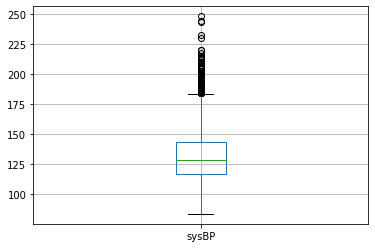

In [ ]:
dataset.boxplot(column='sysBP') #After removing the outliers

In [ ]:
dataset['BMI'].describe()

count    3656.000000
mean       25.784185
std         4.065913
min        15.540000
25%        23.080000
50%        25.380000
75%        28.040000
max        56.800000
Name: BMI, dtype: float64

<Axes: >

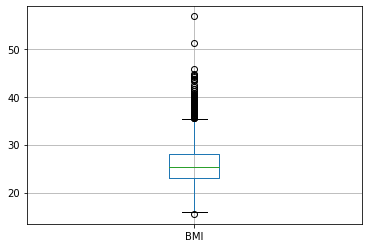

In [ ]:
dataset.boxplot(column='BMI')

In [ ]:
dataset.loc[dataset['BMI'] > 49, 'BMI'] = dataset['BMI'].median()

<Axes: >

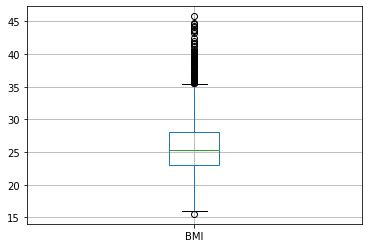

In [ ]:
dataset.boxplot(column='BMI') #After removing the outliers

In [ ]:
dataset['heartRate'].describe()

count    3656.000000
mean       75.730580
std        11.982952
min        44.000000
25%        68.000000
50%        75.000000
75%        82.000000
max       143.000000
Name: heartRate, dtype: float64

<Axes: >

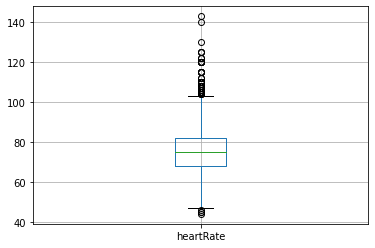

In [ ]:
dataset.boxplot(column='heartRate')

In [ ]:
dataset['glucose'].describe()

count    3656.000000
mean       81.856127
std        23.910128
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

<Axes: >

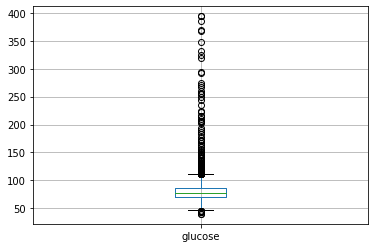

In [ ]:
dataset.boxplot(column='glucose')

Above we observed that the Glucose level and Heart Rate have not been changed although their boxplots show some outliers, i.e., becuase these levels differ variedly from person to person and can be too high or too low depending upon the person's health.

<ipython-input-33-f698e6492d66>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(dataset.corr(), dtype=np.bool))


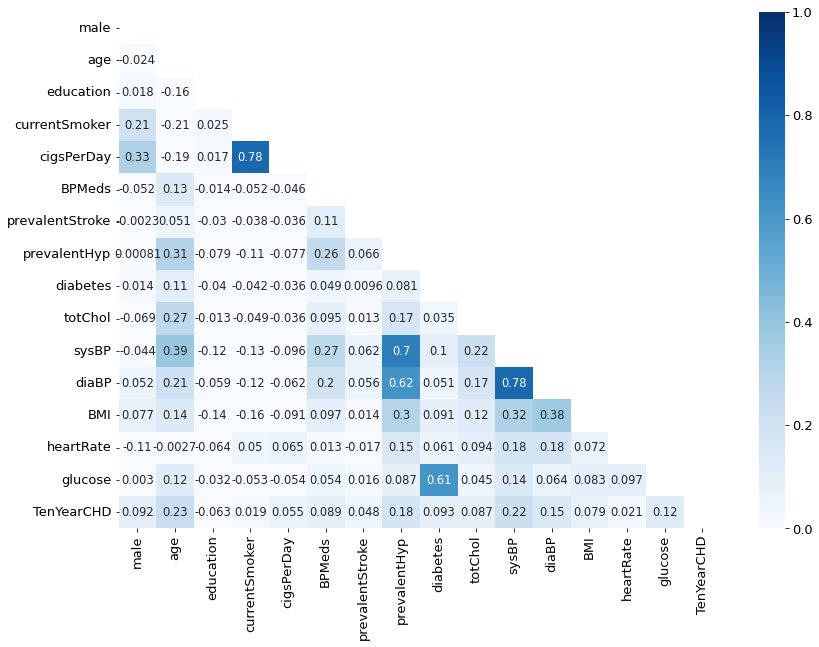

In [ ]:
plt.rc('xtick', labelsize=13)   # fontsize of the tick labels
plt.rc('ytick', labelsize=13)  # fontsize of the tick labels
plt.figure(figsize=(13.5, 9.5))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(dataset.corr(), dtype=np.bool))
heatmap = sns.heatmap(dataset.corr(), mask=mask, vmin=0, vmax=1, annot=True, cmap='Blues', annot_kws={"size": 11.5})

In [ ]:
predictors= dataset.iloc[:, 1:15]
labels= dataset.iloc[:,-1]
x_train, x_test, y_train, y_test= train_test_split(predictors, labels, test_size=0.2)

In [ ]:
#with selected features
data1= dataset[['age', 'prevalentHyp', 'sysBP' ,	'diaBP', 'glucose', 'TenYearCHD']]
predictors1= data1.iloc[:, 0:5]
labels1= data1.iloc[:,-1]

from imblearn.over_sampling import SMOTE
# Perform SMOTE oversampling
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(predictors1, labels1)

x_trainn, x_testt, y_trainn, y_testt= train_test_split(X_resampled, y_resampled, test_size=0.2)


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(x_train, y_train)

In [ ]:
from numpy import set_printoptions
set_printoptions(precision=2)
print(np.round(fit.scores_))
features = fit.transform(x_train)
# summarize selected features
print(features[0:5,:])

[159.  15.   1.   6.  16.   8.  95.  38.  20. 129.  70.  21.   1.  57.]
[[ 46.    0.  105.5  67. ]
 [ 44.    0.  120.   80. ]
 [ 36.    0.  107.   73.5]
 [ 46.    1.  144.   79. ]
 [ 64.    0.  114.   73. ]]


<BarContainer object of 14 artists>

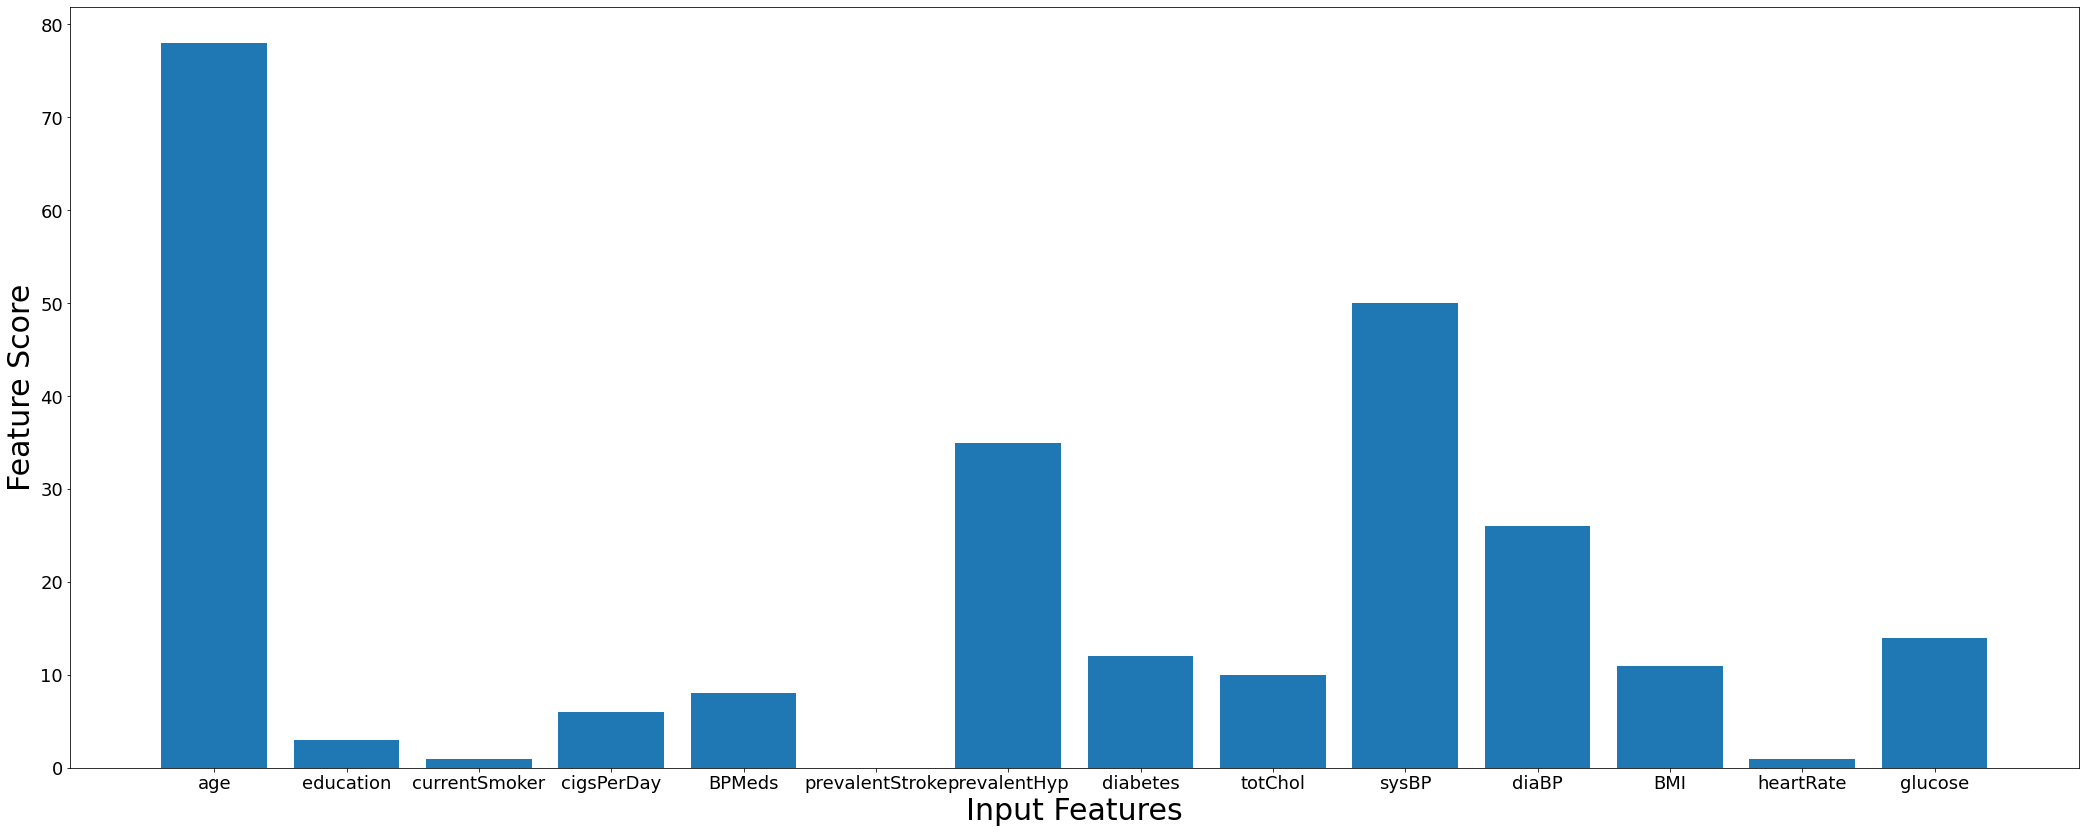

In [ ]:
from matplotlib import rcParams
data=[78,  3,  1,  6,  8,  0, 35, 12, 10, 50, 26, 11,  1, 14]
labelsize=18
rcParams['xtick.labelsize']= labelsize
rcParams['ytick.labelsize']= labelsize
plt.figure(figsize =(36, 14))
labels = ['age',	'education',	'currentSmoker',	'cigsPerDay',	'BPMeds',	'prevalentStroke',	'prevalentHyp',	'diabetes',	'totChol',	'sysBP',	'diaBP',	'BMI',	'heartRate',	'glucose']
#labels = X.columns
plt.xlabel('Input Features', fontsize=30)
plt.ylabel('Feature Score', fontsize=30)
plt.bar(labels, data)

**1.Extra Trees Classifier**

Accuracy: 0.8709677419354839
Precision: 0.8662704309063893
Recall: 0.892802450229709
F1-score: 0.8793363499245852
Confusion Matrix: 
 [[497  90]
 [ 70 583]]


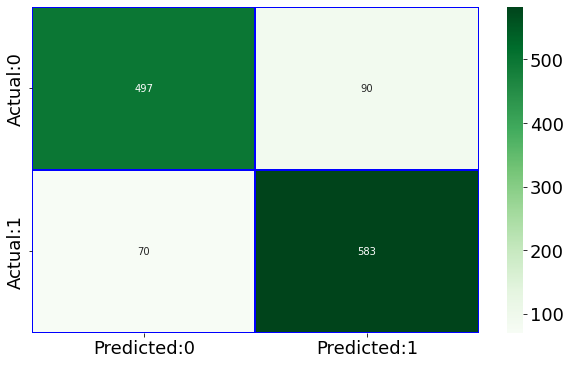

In [ ]:
# Train the Extra Trees Classifier on the training data
from sklearn.ensemble import ExtraTreesClassifier
clf1 = ExtraTreesClassifier(n_estimators=100, random_state=42)
clf1.fit(x_trainn, y_trainn)

# Predict on the test data
y_pred1 = clf1.predict(x_testt)

from sklearn.metrics import accuracy_score
# Calculate the accuracy of the model
acc1 = accuracy_score(y_testt, y_pred1)
print('Accuracy:', acc1)

# Calculate the precision, recall, and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision1 = precision_score(y_testt, y_pred1)
recall1 = recall_score(y_testt, y_pred1)
f1_1 = f1_score(y_testt, y_pred1)

# Print the results
print("Precision:", precision1)
print("Recall:", recall1)
print("F1-score:", f1_1)

conf_mat1 = confusion_matrix(y_testt, y_pred1)
print('Confusion Matrix: \n', conf_mat1)

#Plotting the confusion matrix
conf_matrix1 = pd.DataFrame(data = conf_mat1,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (10, 6))
sns.heatmap(conf_matrix1, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue", linewidths=1.5)
plt.show()



**2. Bagging Classifier**

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.6766129032258065
Precision: 0.6914893617021277
Recall: 0.6967840735068913
F1-score: 0.6941266209000764
Confusion Matrix: 
 [[384 203]
 [198 455]]


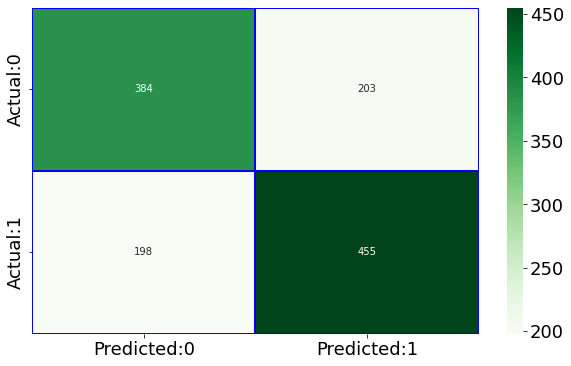

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the base estimator
base_estimator = DecisionTreeClassifier(max_depth=4)

# Define the Bagging Classifier
bagging_clf = BaggingClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

# Fit the Bagging Classifier to the training data
bagging_clf.fit(x_trainn, y_trainn)

# Predict the target on the test data
y_pred2 = bagging_clf.predict(x_testt)

# Calculate the accuracy, precision, recall, and F1-score
accuracy2 = accuracy_score(y_testt, y_pred2)
precision2 = precision_score(y_testt, y_pred2)
recall2 = recall_score(y_testt, y_pred2)
f1_2 = f1_score(y_testt, y_pred2)

# Print the results
print("Accuracy:", accuracy2)
print("Precision:", precision2)
print("Recall:", recall2)
print("F1-score:", f1_2)

conf_mat2 = confusion_matrix(y_testt, y_pred2)
print('Confusion Matrix: \n', conf_mat2)

#Plotting the confusion matrix
conf_matrix2 = pd.DataFrame(data = conf_mat2,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (10, 6))
sns.heatmap(conf_matrix2, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue", linewidths=1.5)
plt.show()



**3.CNN**

Epoch 1/10
124/124 [==============================] - 5s 13ms/step - loss: 0.7444 - accuracy: 0.5726 - val_loss: 0.6663 - val_accuracy: 0.6109
Epoch 2/10
124/124 [==============================] - 1s 8ms/step - loss: 0.6840 - accuracy: 0.5759 - val_loss: 0.7082 - val_accuracy: 0.5151
Epoch 3/10
124/124 [==============================] - 1s 10ms/step - loss: 0.6721 - accuracy: 0.5981 - val_loss: 0.6599 - val_accuracy: 0.6190
Epoch 4/10
124/124 [==============================] - 1s 9ms/step - loss: 0.6673 - accuracy: 0.5998 - val_loss: 0.6722 - val_accuracy: 0.5927
Epoch 5/10
124/124 [==============================] - 2s 13ms/step - loss: 0.6671 - accuracy: 0.5983 - val_loss: 0.6621 - val_accuracy: 0.6159
Epoch 6/10
124/124 [==============================] - 1s 10ms/step - loss: 0.6637 - accuracy: 0.5923 - val_loss: 0.6676 - val_accuracy: 0.6119
Epoch 7/10
124/124 [==============================] - 1s 8ms/step - loss: 0.6602 - accuracy: 0.6162 - val_loss: 0.6650 - val_accuracy: 0.5988
Ep

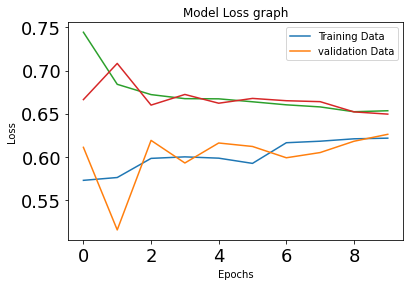

In [ ]:
model3 = keras.Sequential([
    #keras.layers.Flatten(input_shape =(13,)),
    keras.layers.Dense(60, activation = 'relu', input_shape= (5,)),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(40, activation = 'relu'),
    keras.layers.Dense(40, activation = 'relu'),
    keras.layers.Dense(30, activation = 'relu'),
    keras.layers.Dense(2,activation = 'sigmoid' )
])

#compiling the network

model3.compile(
        optimizer = 'adam',
        loss = 'sparse_categorical_crossentropy',
        metrics = ['accuracy']
)

#training the neural network
history = model3.fit(x_trainn, y_trainn, validation_split=0.2, epochs = 10)

#Visualizing Accuracy and Losses
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')

plt.legend(['Training Data', 'validation Data'], loc= 'lower right')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss graph')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['Training Data', 'validation Data'], loc= 'upper right')

#model evaluation
loss, accuracy3 = model3.evaluate(x_testt, y_testt)
print(accuracy3)

from sklearn.metrics import classification_report, confusion_matrix
# Predict labels for test set
y_pred3 = model3.predict(x_testt)
y_pred3 = np.argmax(y_pred3, axis=1)

# Calculate precision, recall, F1 score, and support
target_names = ['class 0', 'class 1']
print(classification_report(y_testt, y_pred3, target_names=target_names))

# Calculate confusion matrix
print(confusion_matrix(y_testt, y_pred3))


**4.Logistic Regression**

Training accuracy: 0.6609519967728923
Testing accuracy: 0.675
Confusion Matrix: 
 [[408 179]
 [224 429]]
Accuracy:  0.675
Precision: 0.7055921052631579
Recall: 0.6569678407350689
F1-score: 0.6804123711340206
Classification Report is:

               precision    recall  f1-score   support

           0       0.65      0.70      0.67       587
           1       0.71      0.66      0.68       653

    accuracy                           0.68      1240
   macro avg       0.68      0.68      0.67      1240
weighted avg       0.68      0.68      0.68      1240



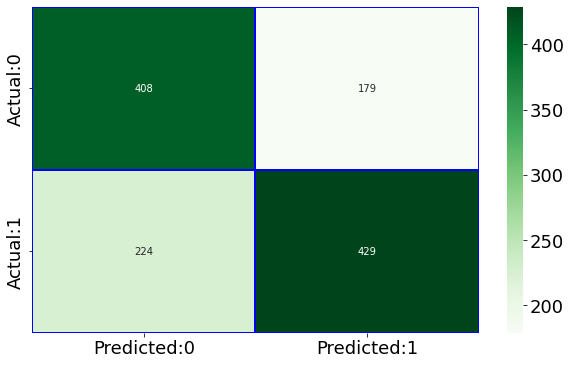

In [ ]:
# Train the logistic regression model
from sklearn.linear_model import LogisticRegression
model4 = LogisticRegression()
model4.fit(x_trainn, y_trainn) #Training the data

from sklearn.metrics import accuracy_score
# Evaluate the model on the training set
train_preds4 = model4.predict(x_trainn)
train_acc4 = accuracy_score(y_trainn, train_preds4)

# Evaluate the model on the testing set
test_preds4 = model4.predict(x_testt)
test_acc4 = accuracy_score(y_testt, test_preds4)

# Print the training and testing accuracies
print("Training accuracy:", train_acc4)
print("Testing accuracy:", test_acc4)

# Make predictions on the testing data
y_pred4 = model4.predict(x_testt)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score
conf_mat4 = confusion_matrix(y_testt, y_pred4)
acc4 = accuracy_score(y_testt, y_pred4)
print('Confusion Matrix: \n', conf_mat4)
print('Accuracy: ', acc4)

# Calculate the precision, recall, and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision4 = precision_score(y_testt, y_pred4)
recall4 = recall_score(y_testt, y_pred4)
f1_4 = f1_score(y_testt, y_pred4)

# Print the results
print("Precision:", precision4)
print("Recall:", recall4)
print("F1-score:", f1_4)

from sklearn.metrics import confusion_matrix, classification_report
print("Classification Report is:\n\n",classification_report(y_testt,y_pred4))  #classification report

#Plotting the confusion matrix
conf_matrix4 = pd.DataFrame(data = conf_mat4,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (10, 6))
sns.heatmap(conf_matrix4, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue", linewidths=1.5)
plt.show()


**5. Decision Tree**

In [ ]:
m5 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 30)
dt.fit(x_trainn,y_trainn)
dt_predicted = dt.predict(x_testt)
dt_conf_matrix = confusion_matrix(y_testt, dt_predicted)
dt_acc_score = accuracy_score(y_testt, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_testt,dt_predicted))

# Calculate the precision, recall, and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision5 = precision_score(y_testt, dt_predicted)
recall5 = recall_score(y_testt, dt_predicted)
f1_5 = f1_score(y_testt, dt_predicted)

# Print the results
print("Precision:", precision5)
print("Recall:", recall5)
print("F1-score:", f1_5)

confussion matrix
[[454 133]
 [122 531]]


Accuracy of DecisionTreeClassifier: 79.43548387096774 

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       587
           1       0.80      0.81      0.81       653

    accuracy                           0.79      1240
   macro avg       0.79      0.79      0.79      1240
weighted avg       0.79      0.79      0.79      1240

Precision: 0.7996987951807228
Recall: 0.8131699846860643
F1-score: 0.806378132118451


**6. Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
m6 = 'Gradient Boosting Classifier'
gvc =  GradientBoostingClassifier()
gvc.fit(x_trainn,y_trainn)
gvc_predicted = gvc.predict(x_testt)
gvc_conf_matrix = confusion_matrix(y_testt, gvc_predicted)
gvc_acc_score = accuracy_score(y_testt, gvc_predicted)
print("confussion matrix")
print(gvc_conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting Classifier:",gvc_acc_score*100,'\n')
print(classification_report(y_testt,gvc_predicted))


# Calculate the precision, recall, and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision6 = precision_score(y_testt, gvc_predicted)
recall6 = recall_score(y_testt, gvc_predicted)
f1_6 = f1_score(y_testt, gvc_predicted)

# Print the results
print("Precision:", precision6)
print("Recall:", recall6)
print("F1-score:", f1_6)

confussion matrix
[[460 127]
 [168 485]]


Accuracy of Gradient Boosting Classifier: 76.20967741935483 

              precision    recall  f1-score   support

           0       0.73      0.78      0.76       587
           1       0.79      0.74      0.77       653

    accuracy                           0.76      1240
   macro avg       0.76      0.76      0.76      1240
weighted avg       0.76      0.76      0.76      1240

Precision: 0.7924836601307189
Recall: 0.7427258805513017
F1-score: 0.7667984189723321


**7. XGboost**

In [ ]:
import xgboost as xgb
# Create an XGBoost classifier
clf7 = xgb.XGBClassifier(learning_rate=0.1, n_estimators=1000, max_depth=6, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic')

# Train the classifier
clf7.fit(x_trainn, y_trainn)

# Make predictions on the test set
y_pred7 = clf7.predict(x_testt)

# Evaluate the performance of the classifier
accuracy7 = accuracy_score(y_testt, y_pred7)
print('Accuracy:', accuracy7)

cm7 = confusion_matrix(y_testt, y_pred7)
print('Confusion matrix:\n', cm7)

cr7 = classification_report(y_testt, y_pred7)
print('Classification report:\n', cr7)

# Calculate the precision, recall, and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision7 = precision_score(y_testt, y_pred7)
recall7 = recall_score(y_testt, y_pred7)
f1_7 = f1_score(y_testt, y_pred7)

# Print the results
print("Precision:", precision7)
print("Recall:", recall7)
print("F1-score:", f1_7)

Accuracy: 0.885483870967742
Confusion matrix:
 [[534  53]
 [ 89 564]]
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88       587
           1       0.91      0.86      0.89       653

    accuracy                           0.89      1240
   macro avg       0.89      0.89      0.89      1240
weighted avg       0.89      0.89      0.89      1240

Precision: 0.9141004862236629
Recall: 0.8637059724349158
F1-score: 0.8881889763779527


**8. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier with 100 trees
clf8 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf8.fit(x_trainn, y_trainn)

# Make predictions on the test set
y_pred8 = clf8.predict(x_testt)

# Evaluate the performance of the classifier
accuracy8 = accuracy_score(y_testt, y_pred8)
print('Accuracy:', accuracy8)

cm8 = confusion_matrix(y_testt, y_pred8)
print('Confusion matrix:\n', cm8)

cr8 = classification_report(y_testt, y_pred8)
print('Classification report:\n', cr8)


# Calculate the precision, recall, and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision8 = precision_score(y_testt, y_pred8)
recall8 = recall_score(y_testt, y_pred8)
f1_8 = f1_score(y_testt, y_pred8)

# Print the results
print("Precision:", precision8)
print("Recall:", recall8)
print("F1-score:", f1_8)

Accuracy: 0.8774193548387097
Confusion matrix:
 [[507  80]
 [ 72 581]]
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       587
           1       0.88      0.89      0.88       653

    accuracy                           0.88      1240
   macro avg       0.88      0.88      0.88      1240
weighted avg       0.88      0.88      0.88      1240

Precision: 0.8789712556732224
Recall: 0.889739663093415
F1-score: 0.8843226788432268


In [ ]:
!pip install lazypredict

import lazypredict
### importing LazyClassifier for classification problem
from lazypredict.Supervised import LazyClassifier

### spliting dataset into training and testing part
from sklearn.model_selection import train_test_split
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_trainn, x_testt, y_trainn, y_testt)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


100%|██████████| 29/29 [00:12<00:00,  2.30it/s]


In [ ]:
models # Results

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.88,0.88,0.88,0.88,0.88
XGBClassifier,0.87,0.88,0.88,0.87,0.39
ExtraTreesClassifier,0.87,0.87,0.87,0.87,0.57
LGBMClassifier,0.87,0.87,0.87,0.87,0.18
BaggingClassifier,0.83,0.83,0.83,0.83,0.18
LabelPropagation,0.81,0.80,0.80,0.81,0.87
DecisionTreeClassifier,0.80,0.80,0.80,0.80,0.04
LabelSpreading,0.80,0.80,0.80,0.80,1.41
KNeighborsClassifier,0.79,0.79,0.79,0.79,0.06
